# Ordinary Differential Equations

## Euler Method

Consider the general form of first-order ordinary differential equation in one variable:
$$ \frac{dx}{dt} = f(x,t) $$
along with an initial condition that fixes the value of $x$ for some $t$. Then we can write the value of $x$ a short interval $h$ later using a Taylor series expansion:
$$ x(t+h) = x(t) + h\frac{dx}{dt} + \frac{1}{2} h^2\frac{d^2x}{dt^2} + ... = x(t) + hf(x,t) + \mathcal{O} $$
If $h$ is small, we can ignore higher order terms and get
$$ x(t+h) = x(t) + hf(x,t) $$
Thus, with the initial value $x(t)$, one can predict subsequent values.  
This method is more useful in solving partial differential equations.  
There are unavoidable approximation errors to this method, which  cumulatively increase after several steps. The cumulative error is given by
$$ \epsilon = \frac{1}{2}h[f(x(b),b) - f(x(a),a)] $$
Thus, the error falls of linearly with $h$. But $h$ being too small, increases the number of steps, which is computationally expensive.

### Use Euler's method to solve the differential equation
$$\frac{dx}{dt} = -x^3 + \sin t $$
with the intial condition, $x=0$ at $t=0$. Plot the result from $t=0$ to $t=10$.

Text(0.5, 0, 't')

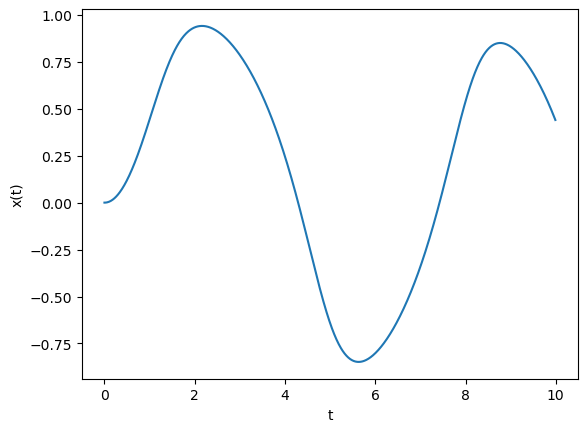

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def f(x,t):
    return -x**3+np.sin(t)

a  = 0.0
b  = 10.0
N  = 1000
h  = (b-a)/N
x0 = 0.0      # initial condition

t = np.arange(a,b,h)
x = []

for tval in t:
    x.append(x0)
    x0 += h*f(x0,tval)
    
plt.plot(t,x)
plt.ylabel('x(t)')
plt.xlabel('t')

## Runge-Kutta (RK) method

Euler's method is the first-order RK method.  
The second-order RK method is also sometimes called the *midpoint method*. The error for RK-2 is $\sim h^3$ (more accurate than Euler -- $\mathcal{O}(h^2)$.  
The most common method, however, is the RK-4 method, which provides maximum accuracy while being relatively simpler to program. These are the equations used to solve an ODE using RK-4:
$$
\begin{align}
k_1 =& hf(x,t)\\
k_2 =& hf(x+\frac{1}{2}k_1, t+\frac{1}{2}h) \\
k_3 =& hf(x+\frac{1}{2}k_2, t+\frac{1}{2}h) \\
k_4 =& hf(x+k_3, t+h) \\
x(t+h) =& x(t) + \frac{1}{6} (k_1+2k_2+2k_3+k_4)
\end{align}
$$
This method is accurate to $\mathcal{O}(h^5)$.

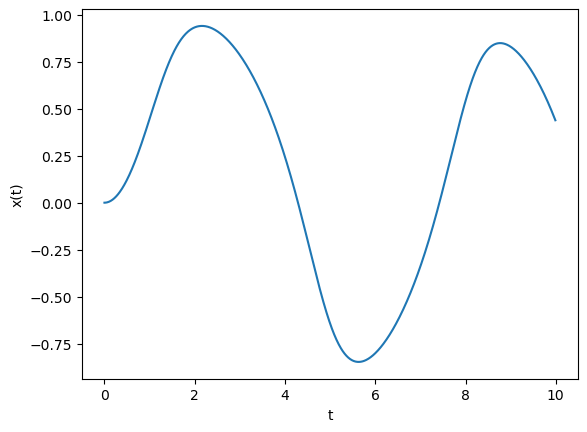

In [2]:
# write your own code to solve the previous ODE using RK4 algorithm

tpoints = np.arange(a,b,h)
xpoints = []
x = 0.0

for t in tpoints:
    xpoints.append(x)
    k1 = h*f(x,t)
    k2 = h*f(x+0.5*k1,t+0.5*h)
    k3 = h*f(x+0.5*k2,t+0.5*h)
    k4 = h*f(x+k3,t+h)
    x += (k1+2*k2+2*k3+k4)/6

plt.plot(tpoints,xpoints)
plt.xlabel("t")
plt.ylabel("x(t)")
plt.show()

## Solutions over Infinite Ranges

$$ \frac{dx}{dt} = \frac{1}{x^2+t^2} $$
from $t=0$ to $t=\infty$ with $x=1$ at $t=0$.  
With the substitution,
$$ u = \frac{t}{1+t} \implies t = \frac{u}{1-u} $$
the above equation takes the form:
$$\frac{dx}{du} = \frac{1}{x^2(1-u)^2 + u^2} $$

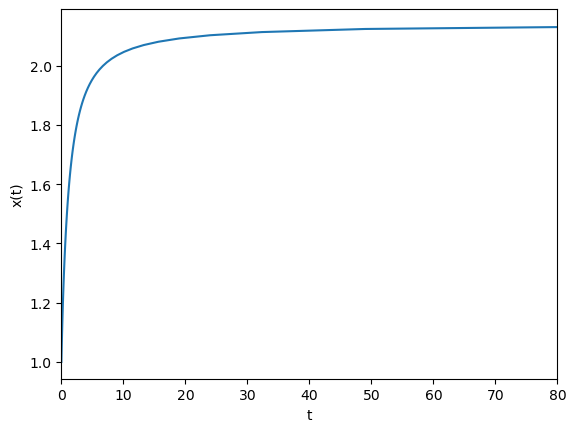

In [3]:
def g(x,u):
    return 1/(x**2*(1-u)**2+u**2)

a = 0.0
b = 1.0
N = 100
h = (b-a)/N

u = np.arange(a,b,h)
t = []
x = []

x0 = 1.0
for uval in u:
    t.append(uval/(1-uval))
    x.append(x0)
    k1 = h*g(x0,uval)
    k2 = h*g(x0+0.5*k1,uval+0.5*h)
    k3 = h*g(x0+0.5*k2,uval+0.5*h)
    k4 = h*g(x0+k3,uval+h)
    x0 += (k1+2*k2+2*k3+k4)/6
    
plt.plot(t,x)
plt.xlim(0,80)
plt.xlabel("t")
plt.ylabel("x(t)")
plt.show()

# Try it yourself

### Total 4 marks

Upload the RK4 method you coded during the class.